In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# Run first-time only
#
# get data files
!wget "https://cdn.freecodecamp.org/project-data/books/book-crossings.zip"

!unzip book-crossings.zip

--2023-07-26 11:56:11--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip.1’

book-crossings.zip. 100%[===================>]  24.88M  20.5MB/s    in 1.2s    

2023-07-26 11:56:12 (20.5 MB/s) - ‘book-crossings.zip.1’ saved [26085508/26085508]

Archive:  book-crossings.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

In [5]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'}
)

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'}
)

In [5]:
# add your code here - consider creating a new cell for each section of code

In [17]:
# overview of df_ratings
df_ratings

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
...,...,...,...
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0


In [18]:
# overview of df_books
df_books

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber
...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger
271375,0525447644,From One to One Hundred,Teri Sloat
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271377,0192126040,Republic (World's Classics),Plato


In [6]:
"""
data size
"""
print(f"number of df_books rows: {df_books.shape[0]}")
print(f"number of df_ratings rows: {df_ratings.shape[0]}")

number of df_books rows: 271379
number of df_ratings rows: 1149780


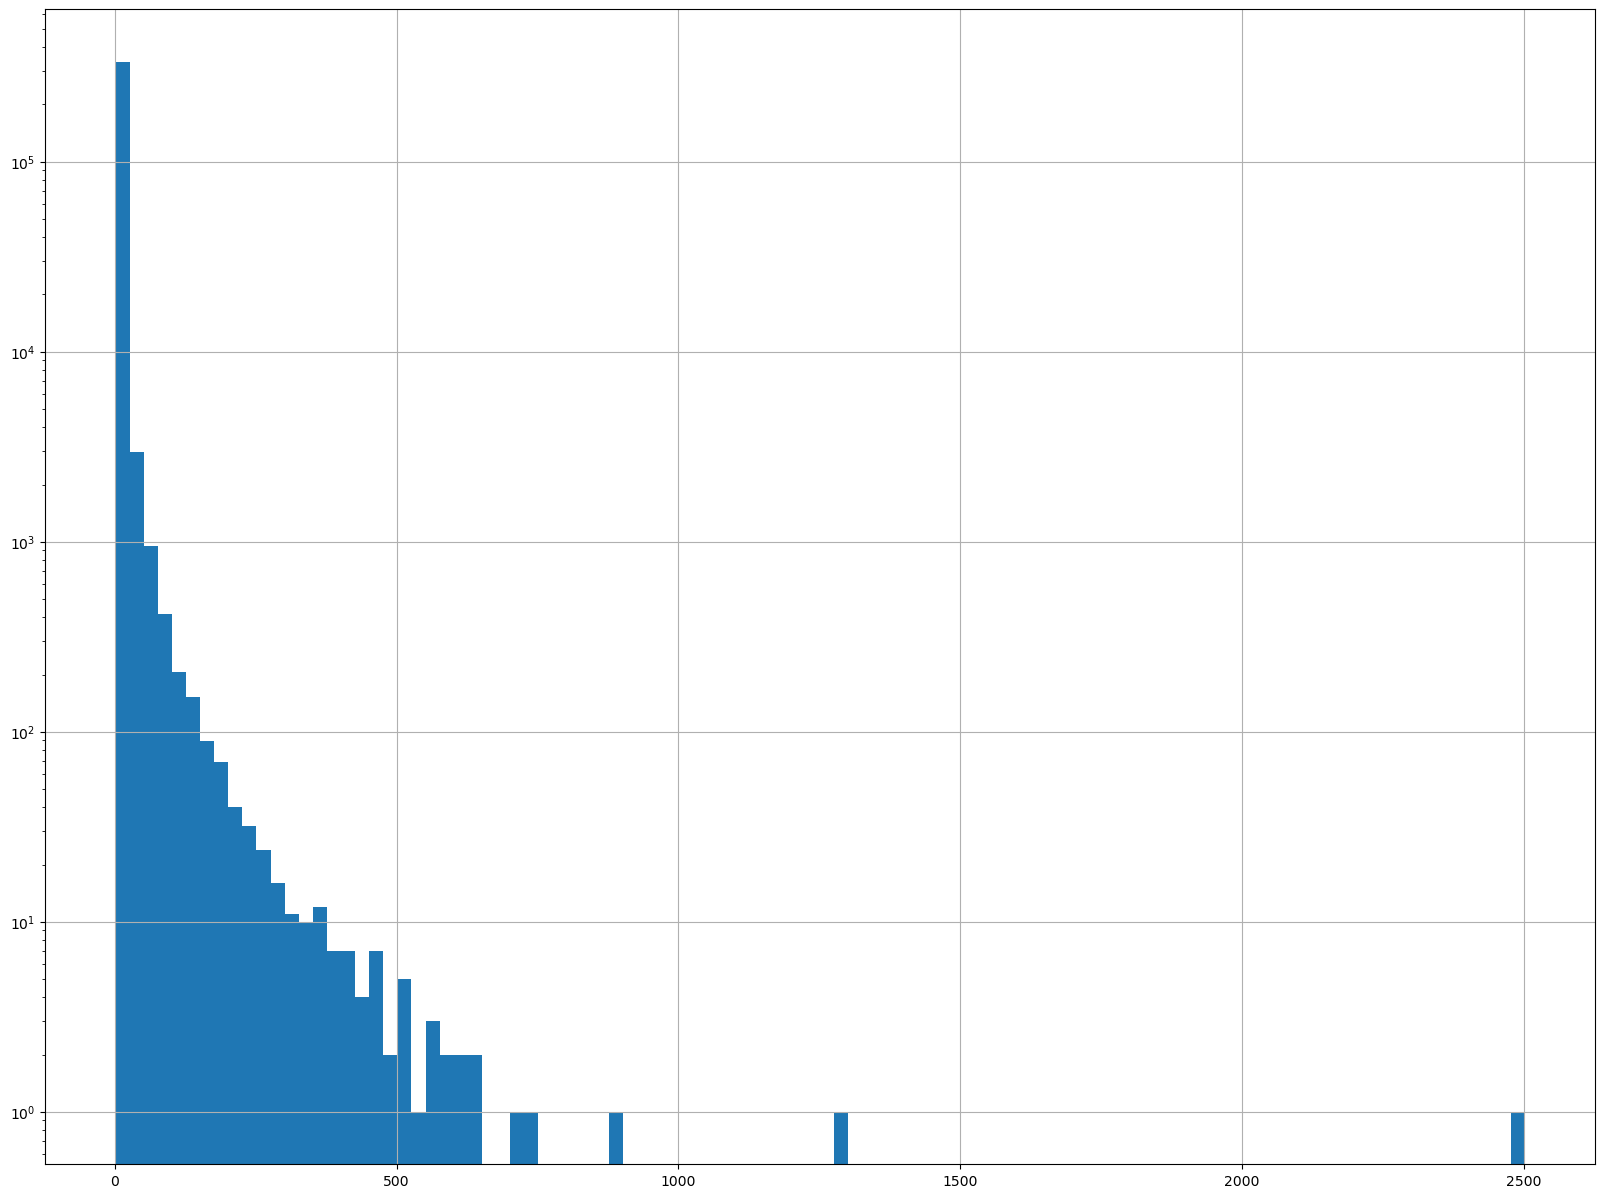

In [19]:
"""
# graph the dataset

Create and display a histogram with
* the x-axis as the number of ratings attached and
* the y-axis as the number of books.
"""
df_unique_ratings = df_ratings["isbn"].value_counts().reset_index(name='counts')
df_unique_ratings["counts"].hist(bins=100, figsize=(20, 15))
plt.yscale('log')
plt.show()

In [26]:
# filter the data
rated_books = df_unique_ratings[df_unique_ratings['counts'] >= 100]
rated_books


,isbn,counts
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723
...,...,...
726,0786866586,100
727,0449203794,100
728,0425151867,100
729,0312966806,100


In [25]:
df_cleaned_books = df_books[df_books['isbn'].isin(rated_books['isbn'])]
df_cleaned_books

,isbn,title,author
18,0440234743,The Testament,John Grisham
19,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison
26,0971880107,Wild Animus,Rich Shapero
27,0345402871,Airframe,Michael Crichton
28,0345417623,Timeline,MICHAEL CRICHTON
...,...,...,...
28072,0425178765,Easy Prey,John Sandford
29215,0449223604,M Is for Malice,Sue Grafton
30535,0345444884,The Talisman,STEPHEN KING
30775,0060008032,Angels,Marian Keyes


In [22]:
ratings_by_user = df_ratings["user"].value_counts().reset_index(name='counts')
active_users = ratings_by_user[ratings_by_user['counts'] >= 200]
active_users

,user,counts
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
...,...,...
900,83671,200
901,252827,200
902,99955,200
903,36554,200


In [29]:
df_cleaned_ratings = df_ratings[(df_ratings['user'].isin(active_users['user'])) & (df_ratings['isbn'].isin(rated_books['isbn']))]
df_cleaned_books

,isbn,title,author
18,0440234743,The Testament,John Grisham
19,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison
26,0971880107,Wild Animus,Rich Shapero
27,0345402871,Airframe,Michael Crichton
28,0345417623,Timeline,MICHAEL CRICHTON
...,...,...,...
28072,0425178765,Easy Prey,John Sandford
29215,0449223604,M Is for Malice,Sue Grafton
30535,0345444884,The Talisman,STEPHEN KING
30775,0060008032,Angels,Marian Keyes


In [ ]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
  

  return recommended_books

In [4]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

NameError: name 'get_recommends' is not defined